In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
loanDefault = pd.read_csv("LoanDefault.csv")

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_93898/3117759511.py:1: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  loanDefault = pd.read_csv("LoanDefault.csv")


## Data Preprocessing

In [3]:
loanDefault.info

<bound method DataFrame.info of                                                     id  member_id  loan_amnt  \
0                                              1077501  1296599.0     5000.0   
1                                              1077430  1314167.0     2500.0   
2                                              1077175  1313524.0     2400.0   
3                                              1076863  1277178.0    10000.0   
4                                              1075358  1311748.0     3000.0   
...                                                ...        ...        ...   
42537                                            70686    70681.0     5000.0   
42538                                              NaN        NaN        NaN   
42539                                              NaN        NaN        NaN   
42540  Total amount funded in policy code 1: 460296150        NaN        NaN   
42541          Total amount funded in policy code 2: 0        NaN        NaN   

       

In [4]:
loanDefault.head(1000)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1057629,1289394.0,2425.0,2425.0,2425.00000,36 months,15.27%,84.39,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
996,1057621,1289385.0,6950.0,6950.0,6950.00000,36 months,9.91%,223.97,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
997,1057787,1289153.0,12375.0,12375.0,12344.46478,36 months,9.91%,398.79,B,B1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
998,1057770,1289135.0,35000.0,35000.0,33906.19420,60 months,20.30%,933.14,E,E5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loanDefault.tail(1000)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
41542,350650,352816.0,6000.0,6000.0,0.0,36 months,11.97%,199.20,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41543,350532,352650.0,4250.0,4250.0,0.0,36 months,16.08%,149.59,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41544,350617,352772.0,3500.0,3500.0,0.0,36 months,10.39%,113.58,B,B4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41545,350603,352751.0,3600.0,3600.0,0.0,36 months,13.24%,121.72,D,D3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
41546,350550,352688.0,4000.0,4000.0,0.0,36 months,12.61%,134.03,D,D1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42540,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#understanding data types of each column
loanDefault.dtypes

id                             object
member_id                     float64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 115, dtype: object

In [7]:
loanDefault.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=115)

array([[<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'funded_amnt'}>,
        <Axes: title={'center': 'funded_amnt_inv'}>,
        <Axes: title={'center': 'installment'}>,
        <Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'dti'}>,
        <Axes: title={'center': 'delinq_2yrs'}>,
        <Axes: title={'center': 'fico_range_low'}>,
        <Axes: title={'center': 'fico_range_high'}>],
       [<Axes: title={'center': 'inq_last_6mths'}>,
        <Axes: title={'center': 'mths_since_last_delinq'}>,
        <Axes: title={'center': 'mths_since_last_record'}>,
        <Axes: title={'center': 'open_acc'}>,
        <Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'total_acc'}>,
        <Axes: title={'center': 'out_prncp'}>,
        <Axes: title={'center': 'out_prncp_inv'}>,
        <Axes: title={'center': 'total_pymnt'}>],
       [<Axes: title={'center': 'total_pymnt_inv'}>,
        <Axes: title={'center': 'total_rec_prnc

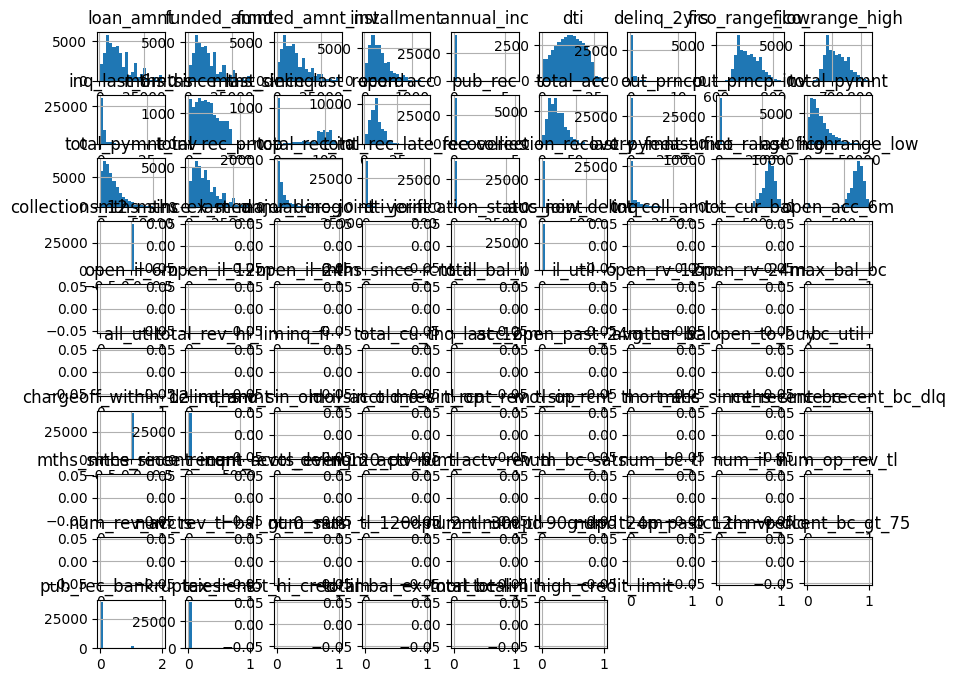

In [8]:
numerical_loanDefault = loanDefault.select_dtypes(include=['number', 'float64'])
numerical_loanDefault = loanDefault.drop(columns=['id', 'member_id', 'emp_title', 'url', 'policy_code', 'desc', 'purpose', 'title', 'zip_code', 
                                        'earliest_cr_line', 'revol_bal', 'initial_list_status', 'application_type'])

# Plot histograms for all numerical columns
numerical_loanDefault.hist(figsize=(10, 8), bins=20)


# Data Issues Handling

### Redundant Feature

In [9]:
# removing columns that are not helpful for predictive analysis
loanDefault = loanDefault.drop(columns=['id', 'member_id', 'emp_title', 'url', 'policy_code', 'desc', 'purpose', 'title', 'zip_code', 
                                        'earliest_cr_line', 'revol_bal', 'initial_list_status', 'application_type'])

### Incomplete Data: Null Values 

In [10]:
print(loanDefault.isnull().sum())

loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
term                              7
int_rate                          7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 102, dtype: int64


In [11]:
missing_percentage = loanDefault.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
loan_amnt                       0.016454
funded_amnt                     0.016454
funded_amnt_inv                 0.016454
term                            0.016454
int_rate                        0.016454
                                 ...    
tax_liens                       0.263269
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 102, dtype: float64


In [12]:
non_null_counts = loanDefault.notnull().sum(axis=1)

print("\nDistribution of non-null values per row:")
print(non_null_counts.value_counts().sort_index())


Distribution of non-null values per row:
0         7
33        5
34       24
41        6
42        5
43       44
44      753
45    23927
46    15172
47     2465
48      134
Name: count, dtype: int64


In [13]:
# remove columns with more than 10% null values
threshold = 90  #10% missing
loanDefault = loanDefault.dropna(axis=1, thresh=int(len(loanDefault) * (1 - threshold/100)))

# fill nulls with median for numeric columns
numeric_columns = loanDefault.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    loanDefault[col].fillna(loanDefault[col].median(), inplace=True)

# fill nulls with mode for categorical columns 
categorical_columns = loanDefault.select_dtypes(include=['object']).columns
for col in categorical_columns:
    loanDefault[col].fillna(loanDefault[col].mode()[0], inplace=True)

print("\nRemaining null values:")
print(loanDefault.isnull().sum())


Remaining null values:
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
addr_state                    0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp 

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_93898/3427795261.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loanDefault[col].fillna(loanDefault[col].median(), inplace=True)
/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_93898/3427795261.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [14]:
loanDefault.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [15]:
len(loanDefault.columns)

46

In [16]:
loanDefault.shape

(42542, 46)

### Outlier 

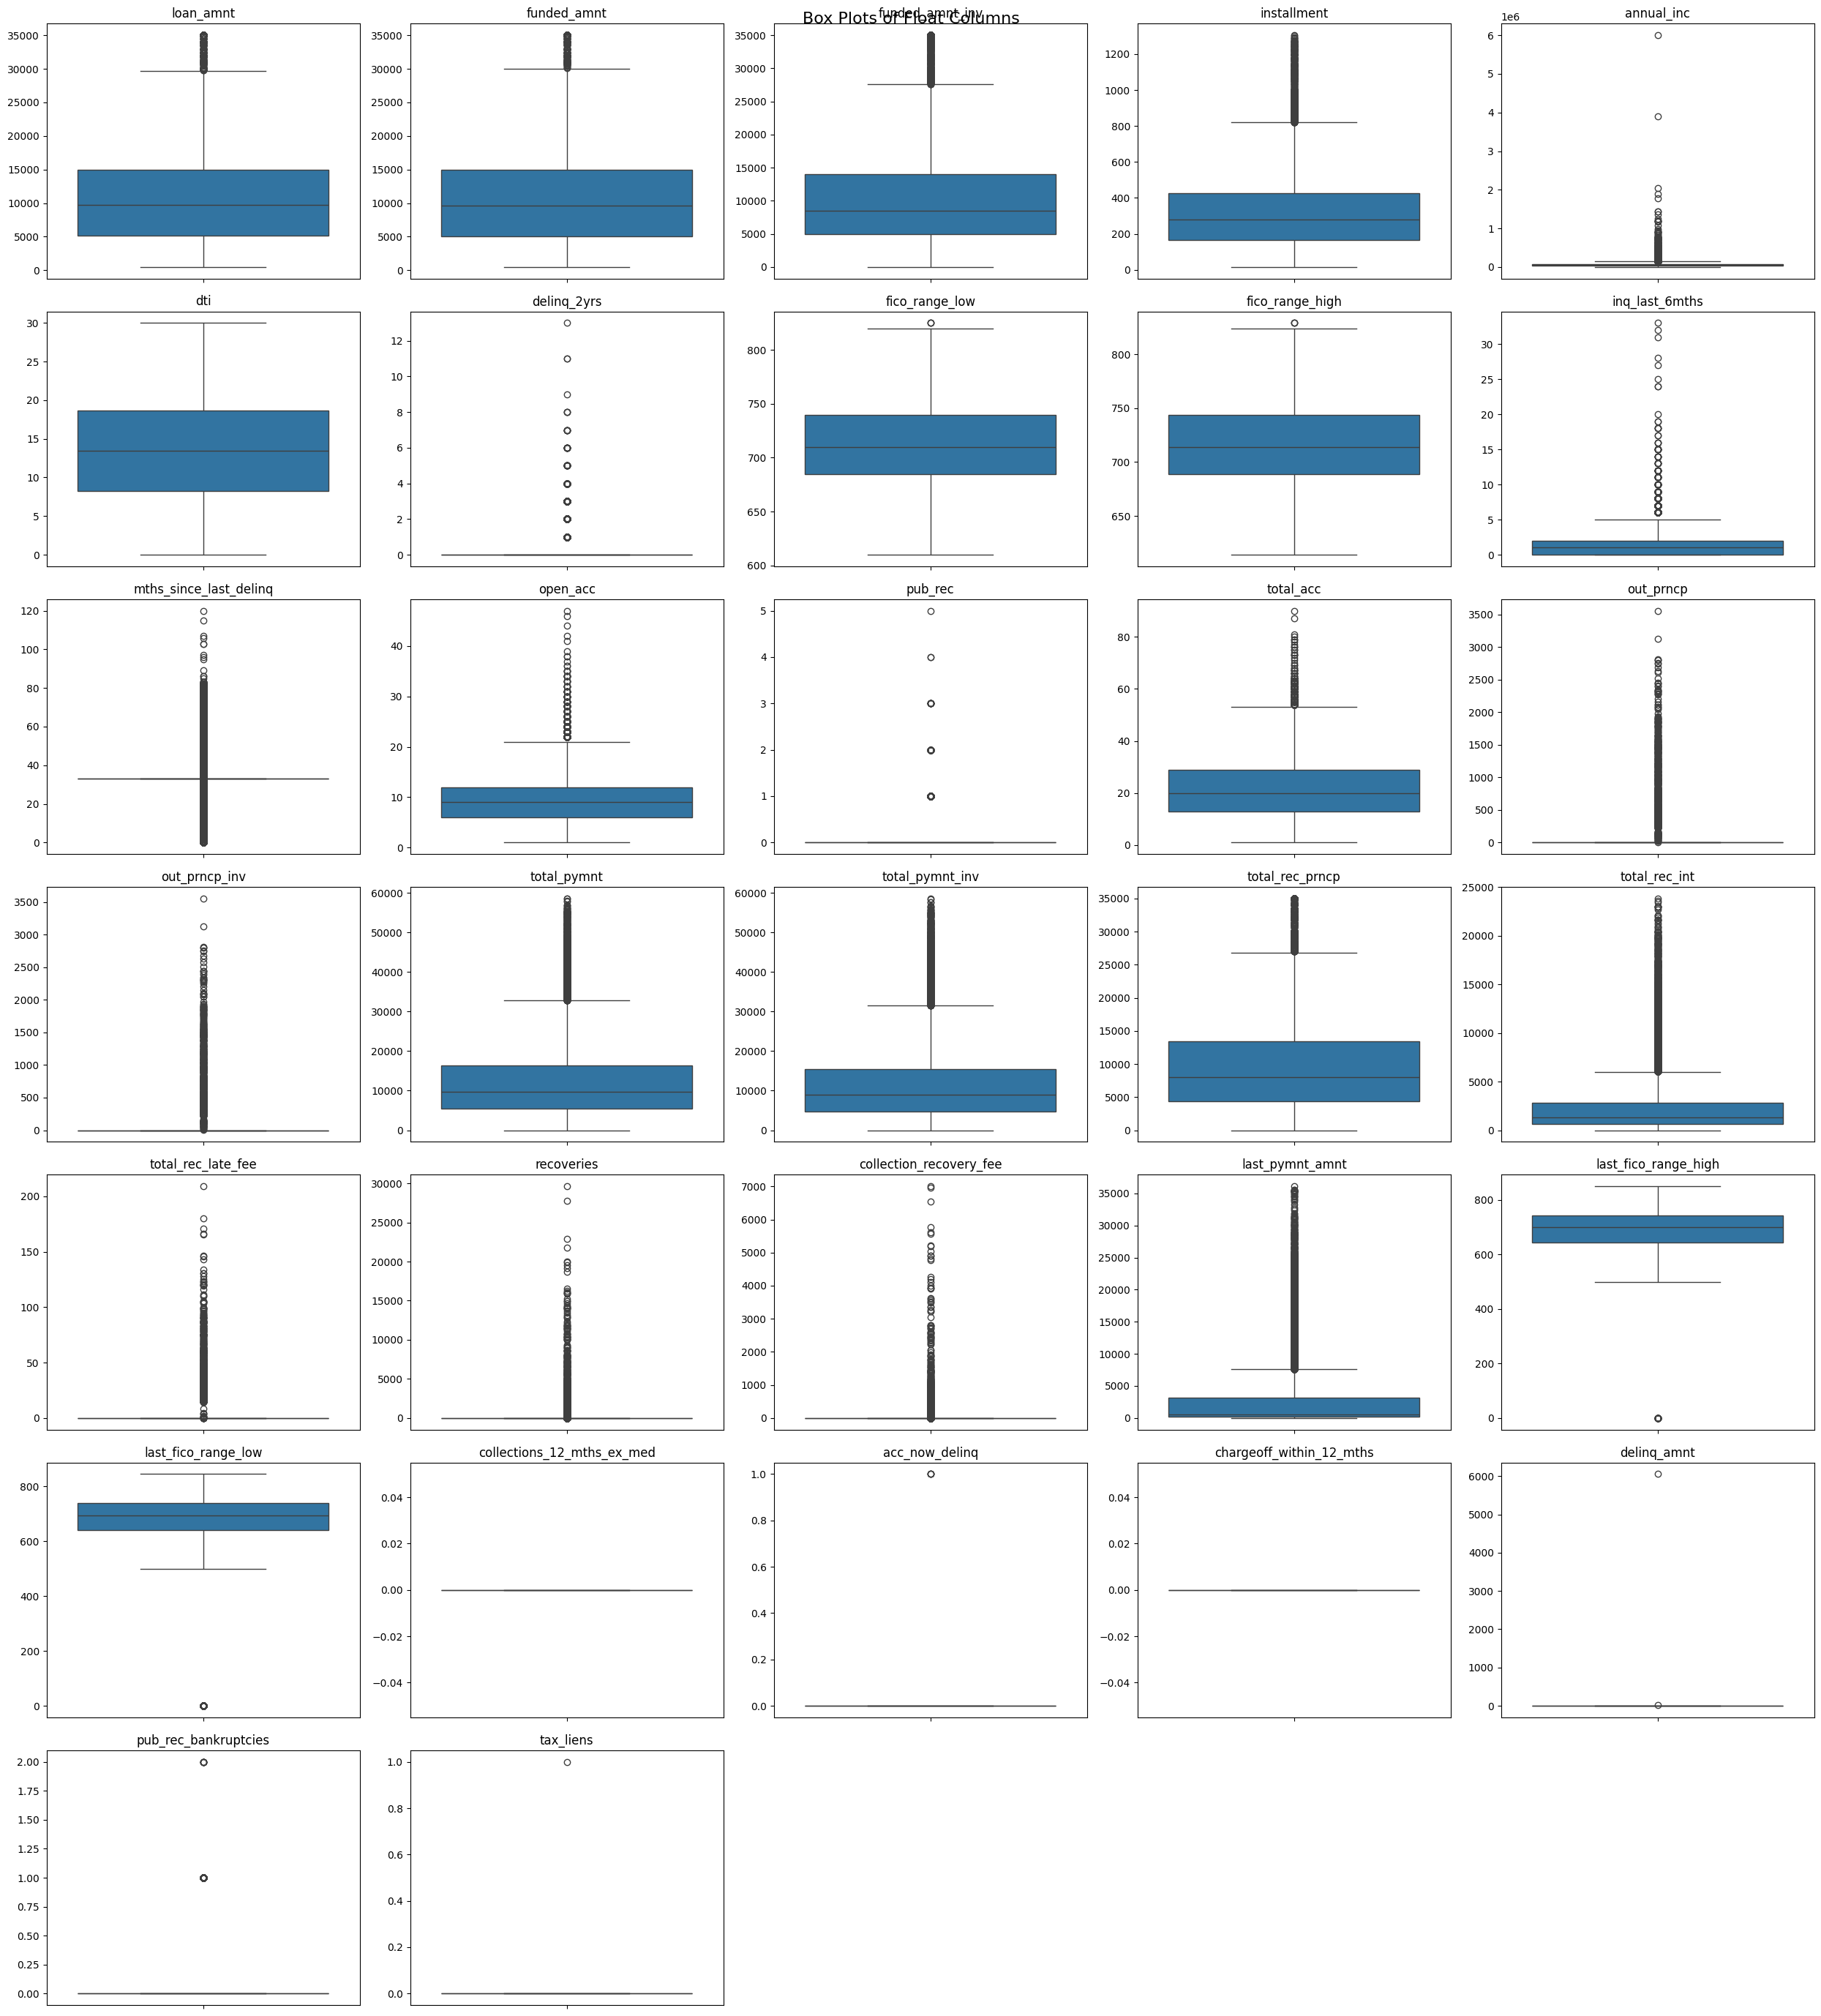

In [17]:
# get all float columns
float_columns = loanDefault.select_dtypes(include=['float64']).columns

# calculate the number of rows and columns for the subplot grid
n_cols = 5  # the number of plots per row
n_rows = (len(float_columns) - 1) // n_cols + 1

# create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Box Plots of Float Columns', fontsize=16)

# flatten the axes array for easier indexing
axes = axes.flatten()

# plot boxplots for each float column
for i, column in enumerate(float_columns):
    sns.boxplot(data=loanDefault, y=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')  # removing y-label as it's redundant with the title

# remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [18]:
# Capping method/Winsorization to remove outliers
def cap_outliers(df, column, lower_percentile, upper_percentile):
    lower = df[column].quantile(lower_percentile)
    upper = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower, upper)
    return df

loanDefault = cap_outliers(loanDefault, 'loan_amnt', 0.05, 0.8)
loanDefault = cap_outliers(loanDefault, 'funded_amnt', 0.05, 0.8)
loanDefault = cap_outliers(loanDefault, 'funded_amnt_inv', 0.05, 0.75)
loanDefault = cap_outliers(loanDefault, 'installment', 0.05, 0.6)
loanDefault = cap_outliers(loanDefault, 'annual_inc', 0.001, 0.1)
loanDefault = cap_outliers(loanDefault, 'delinq_2yrs', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'fico_range_low', 0.01, 0.95)
loanDefault = cap_outliers(loanDefault, 'fico_range_high', 0.01, 0.95)
loanDefault = cap_outliers(loanDefault, 'inq_last_6mths', 0.01, 0.9)
loanDefault = cap_outliers(loanDefault, 'mths_since_last_delinq', 0.35, 0.35)
loanDefault = cap_outliers(loanDefault, 'open_acc', 0.01, 0.5)
loanDefault = cap_outliers(loanDefault, 'pub_rec', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'total_acc', 0.01, 0.55)
loanDefault = cap_outliers(loanDefault, 'out_prncp', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'out_prncp_inv', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'total_pymnt', 0.01, 0.5)
loanDefault = cap_outliers(loanDefault, 'total_pymnt_inv', 0.01, 0.5)
loanDefault = cap_outliers(loanDefault, 'total_rec_prncp', 0.01, 0.75)
loanDefault = cap_outliers(loanDefault, 'total_rec_int', 0.01, 0.3)
loanDefault = cap_outliers(loanDefault, 'total_rec_late_fee', 0., 0.9)
loanDefault = cap_outliers(loanDefault, 'recoveries', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'total_rec_late_fee', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'collection_recovery_fee', 0.01, 0.1)
loanDefault = cap_outliers(loanDefault, 'last_pymnt_amnt', 0.01, 0.35)
loanDefault = cap_outliers(loanDefault, 'last_fico_range_high', 0.55, 0.999)
loanDefault = cap_outliers(loanDefault, 'last_fico_range_low', 0.55, 0.999)

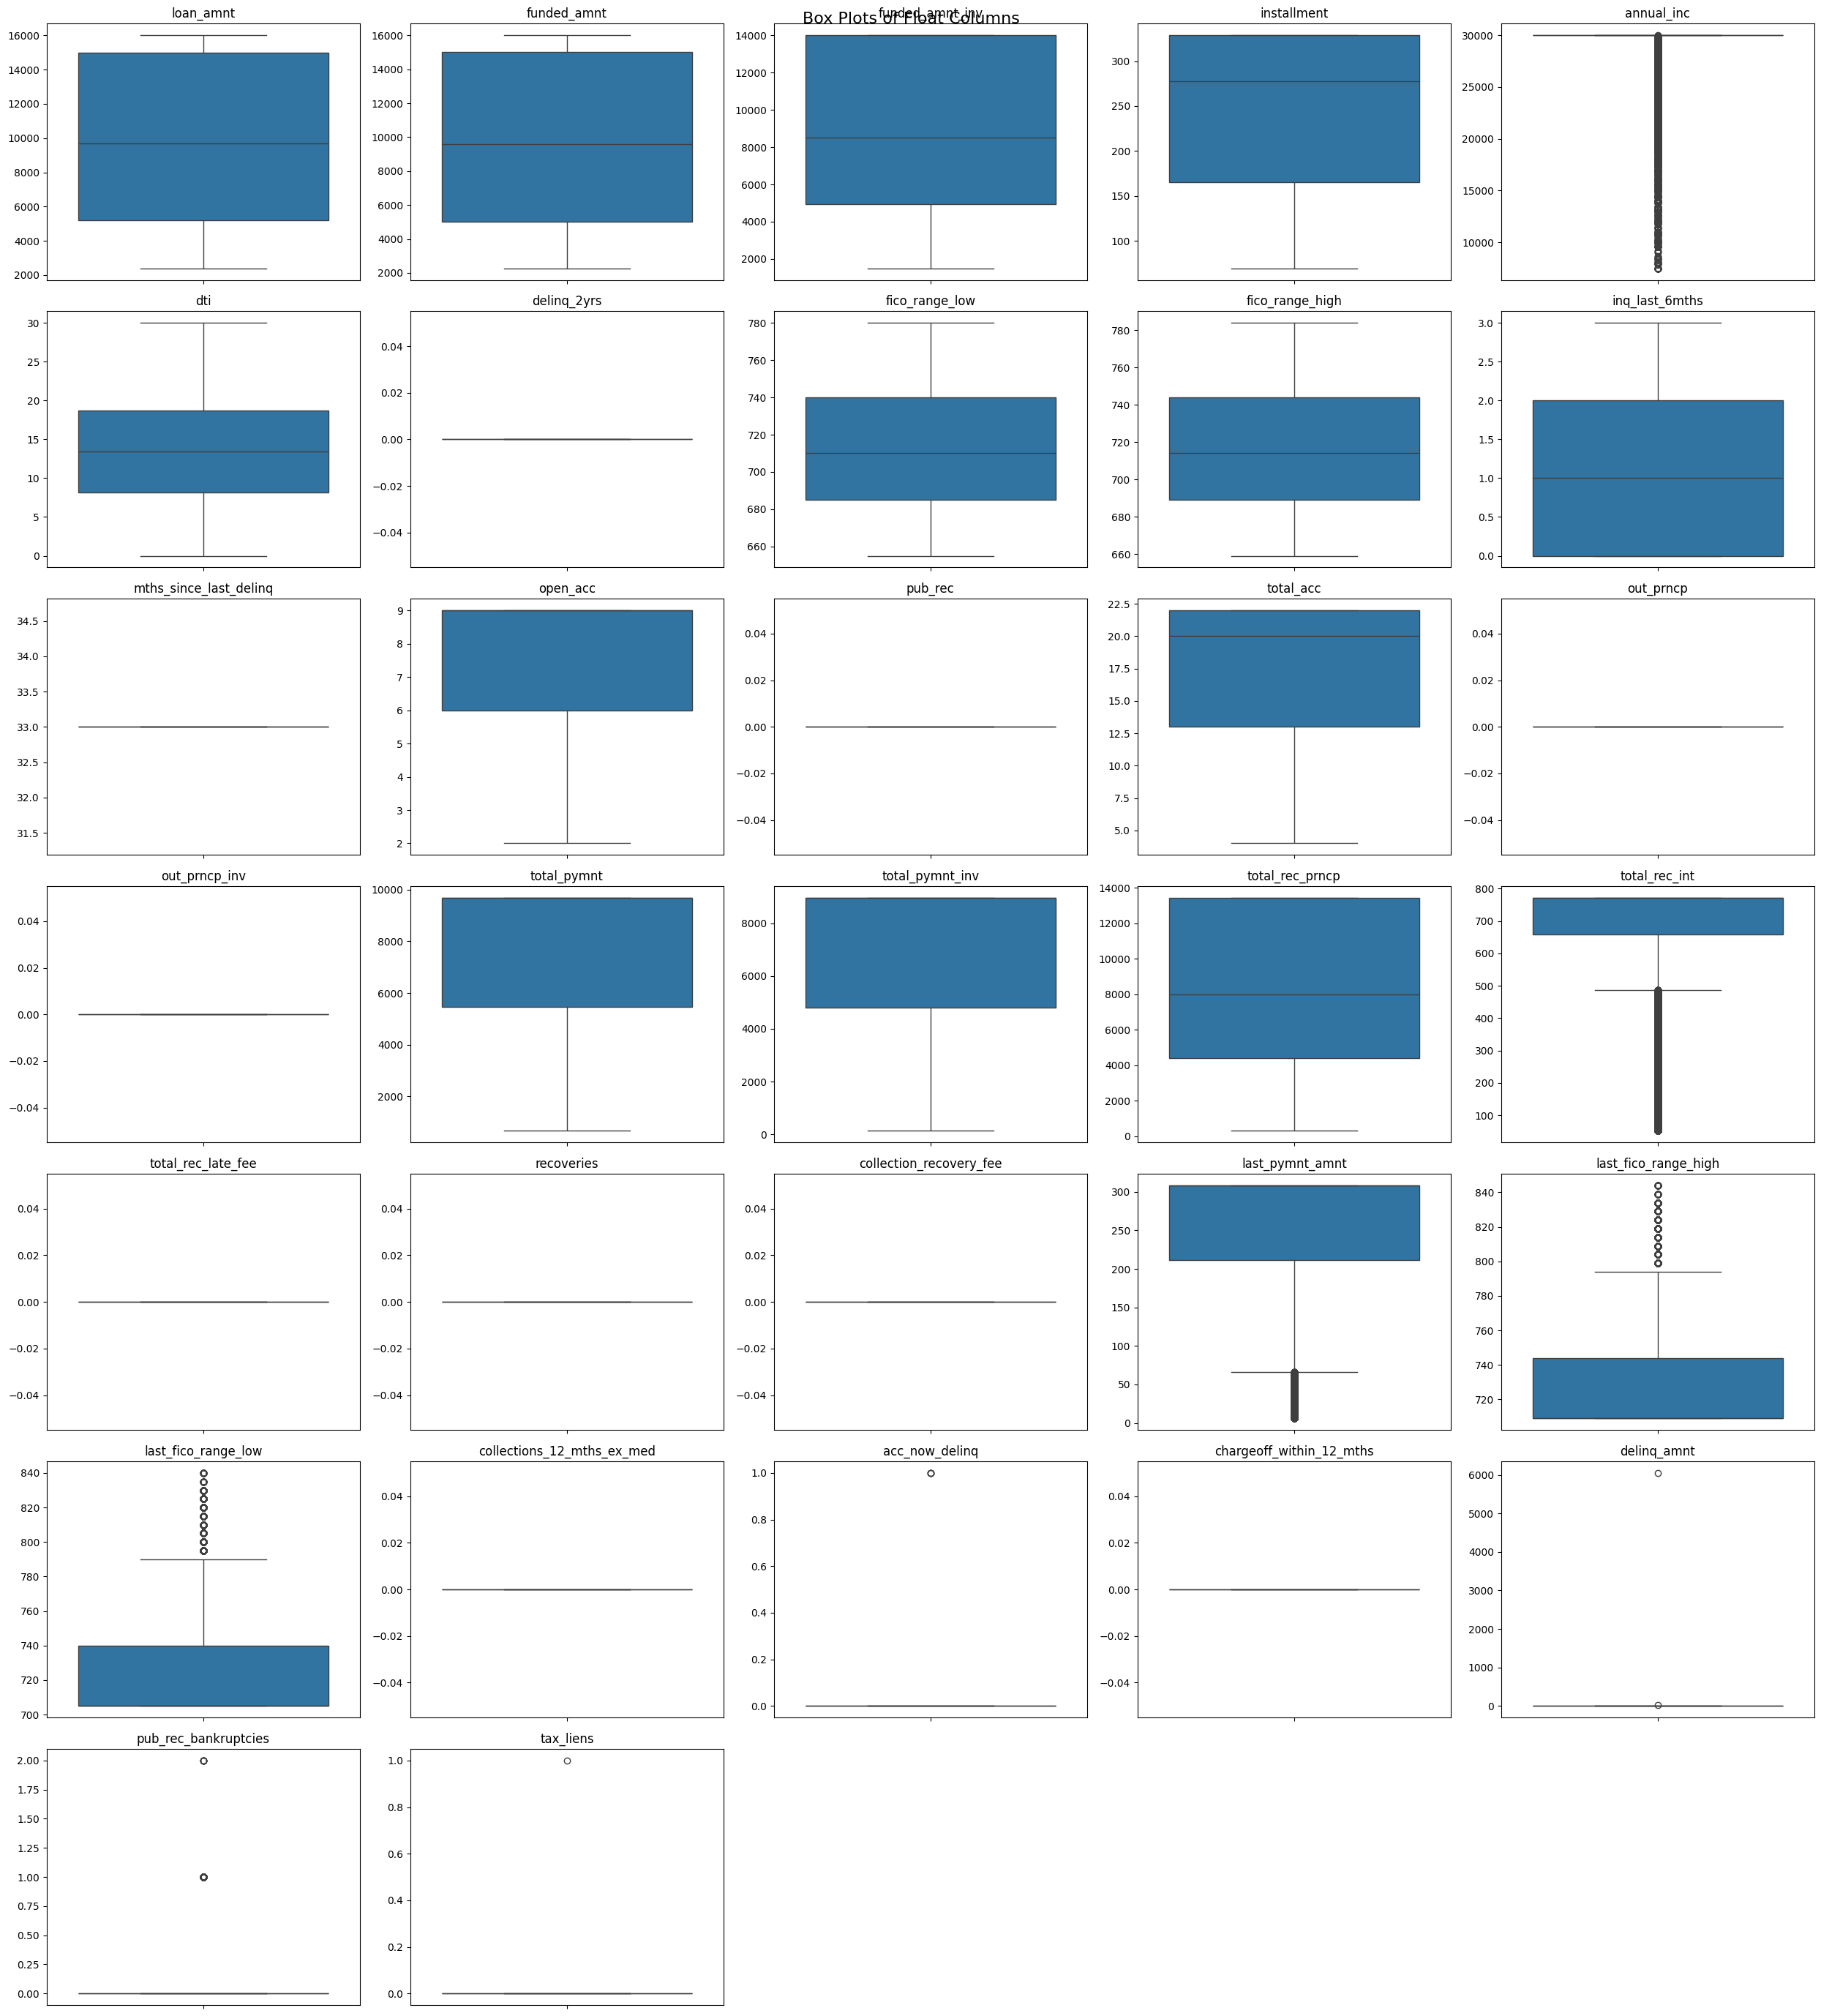

In [19]:
# get all float columns
float_columns = loanDefault.select_dtypes(include=['float64']).columns

# calculate the number of rows and columns for the subplot grid
n_cols = 5  # the number of plots per row
n_rows = (len(float_columns) - 1) // n_cols + 1

# create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
fig.suptitle('Box Plots of Float Columns', fontsize=16)

# flatten the axes array for easier indexing
axes = axes.flatten()

# plot boxplots for each float column
for i, column in enumerate(float_columns):
    sns.boxplot(data=loanDefault, y=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_ylabel('')  # removing y-label as it's redundant with the title

# remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [20]:
with pd.option_context('display.max_columns', None):
    loanDefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42542 non-null  float64
 1   funded_amnt                 42542 non-null  float64
 2   funded_amnt_inv             42542 non-null  float64
 3   term                        42542 non-null  object 
 4   int_rate                    42542 non-null  object 
 5   installment                 42542 non-null  float64
 6   grade                       42542 non-null  object 
 7   sub_grade                   42542 non-null  object 
 8   emp_length                  42542 non-null  object 
 9   home_ownership              42542 non-null  object 
 10  annual_inc                  42542 non-null  float64
 11  verification_status         42542 non-null  object 
 12  issue_d                     42542 non-null  object 
 13  loan_status                 425

### Duplicating Data

In [21]:
# dropping off duplicating rows with same column values
loanDefault = loanDefault.drop_duplicates()

In [22]:
loanDefault.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

### Data Inconsistency

In [23]:
# 'int_rate' column, values come with redundant element "%", keeping only the coefficient
# Remove % and convert to float
loanDefault['int_rate'] = loanDefault['int_rate'].str.rstrip('%').astype('float') / 100.0

# 'term' column, values come with redundant element "months", keeping the numerical month value only
# Remove 'months' and convert to int
loanDefault['term'] = loanDefault['term'].str.replace(' months', '').astype('int')

In [24]:
loanDefault['int_rate'].head(100)

0     0.1065
1     0.1527
2     0.1596
3     0.1349
4     0.1269
       ...  
95    0.2206
96    0.1171
97    0.1727
98    0.0603
99    0.1269
Name: int_rate, Length: 100, dtype: float64

In [25]:
loanDefault['term'].head(100)

0     36
1     60
2     36
3     36
4     60
      ..
95    60
96    60
97    60
98    36
99    60
Name: term, Length: 100, dtype: int64

# Exploratory Data Analysis (EDA)

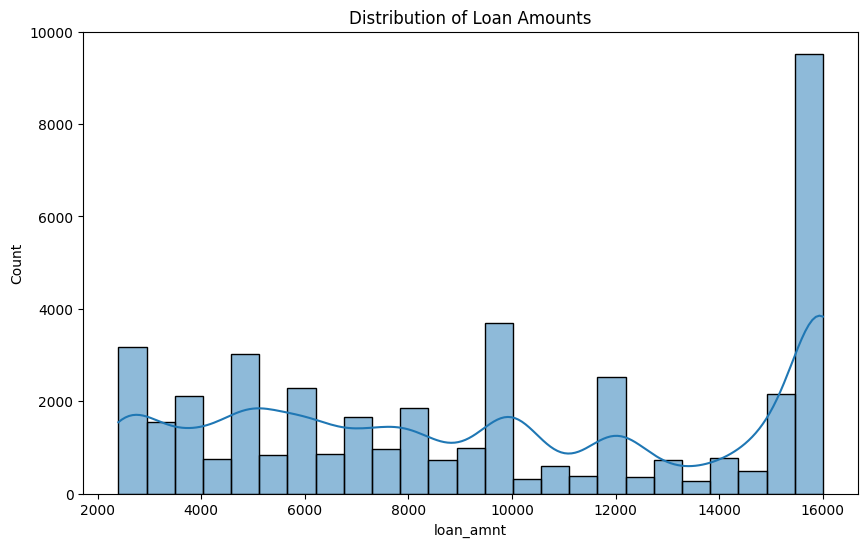

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(loanDefault['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

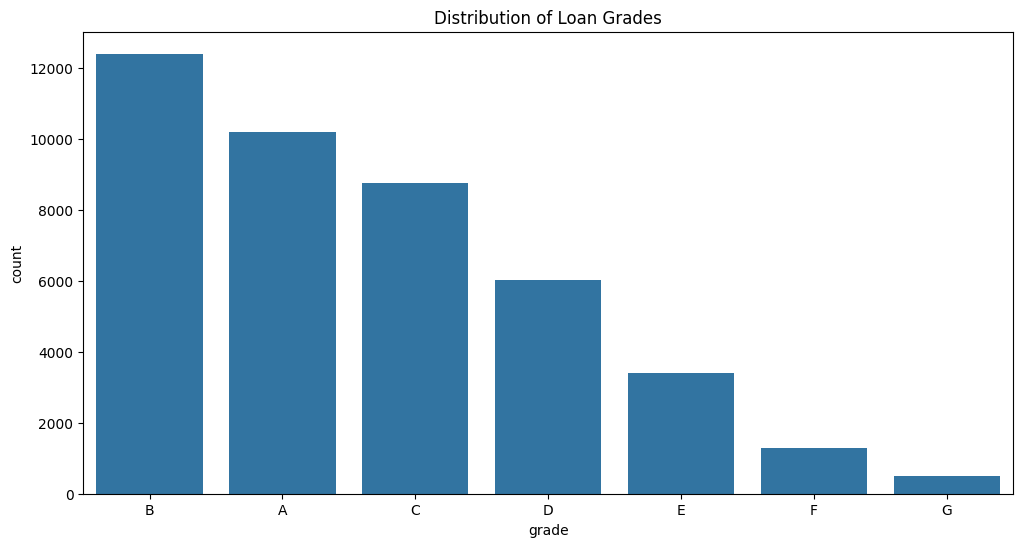

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', data=loanDefault, order=loanDefault['grade'].value_counts().index)
plt.title('Distribution of Loan Grades')
plt.show()

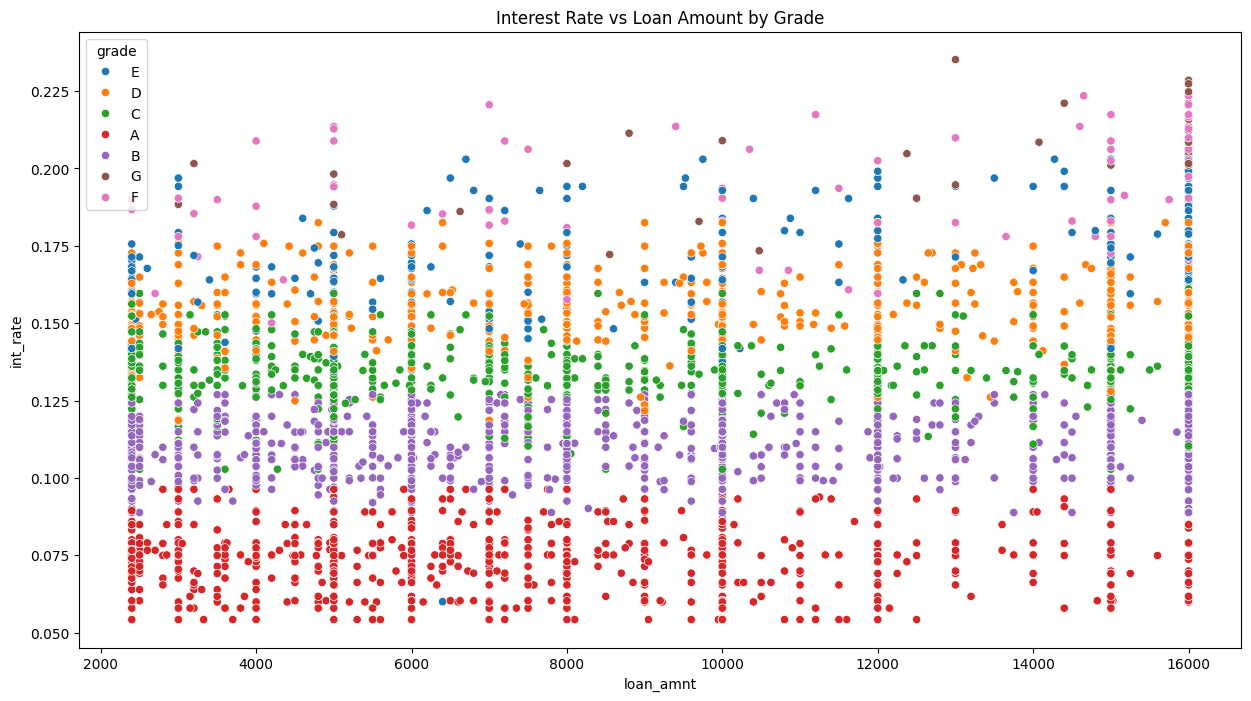

In [28]:
sampled_data = loanDefault.sample(frac=0.1, random_state=1)
plt.figure(figsize=(15, 8))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='grade', data=sampled_data)
plt.title('Interest Rate vs Loan Amount by Grade')
plt.show()

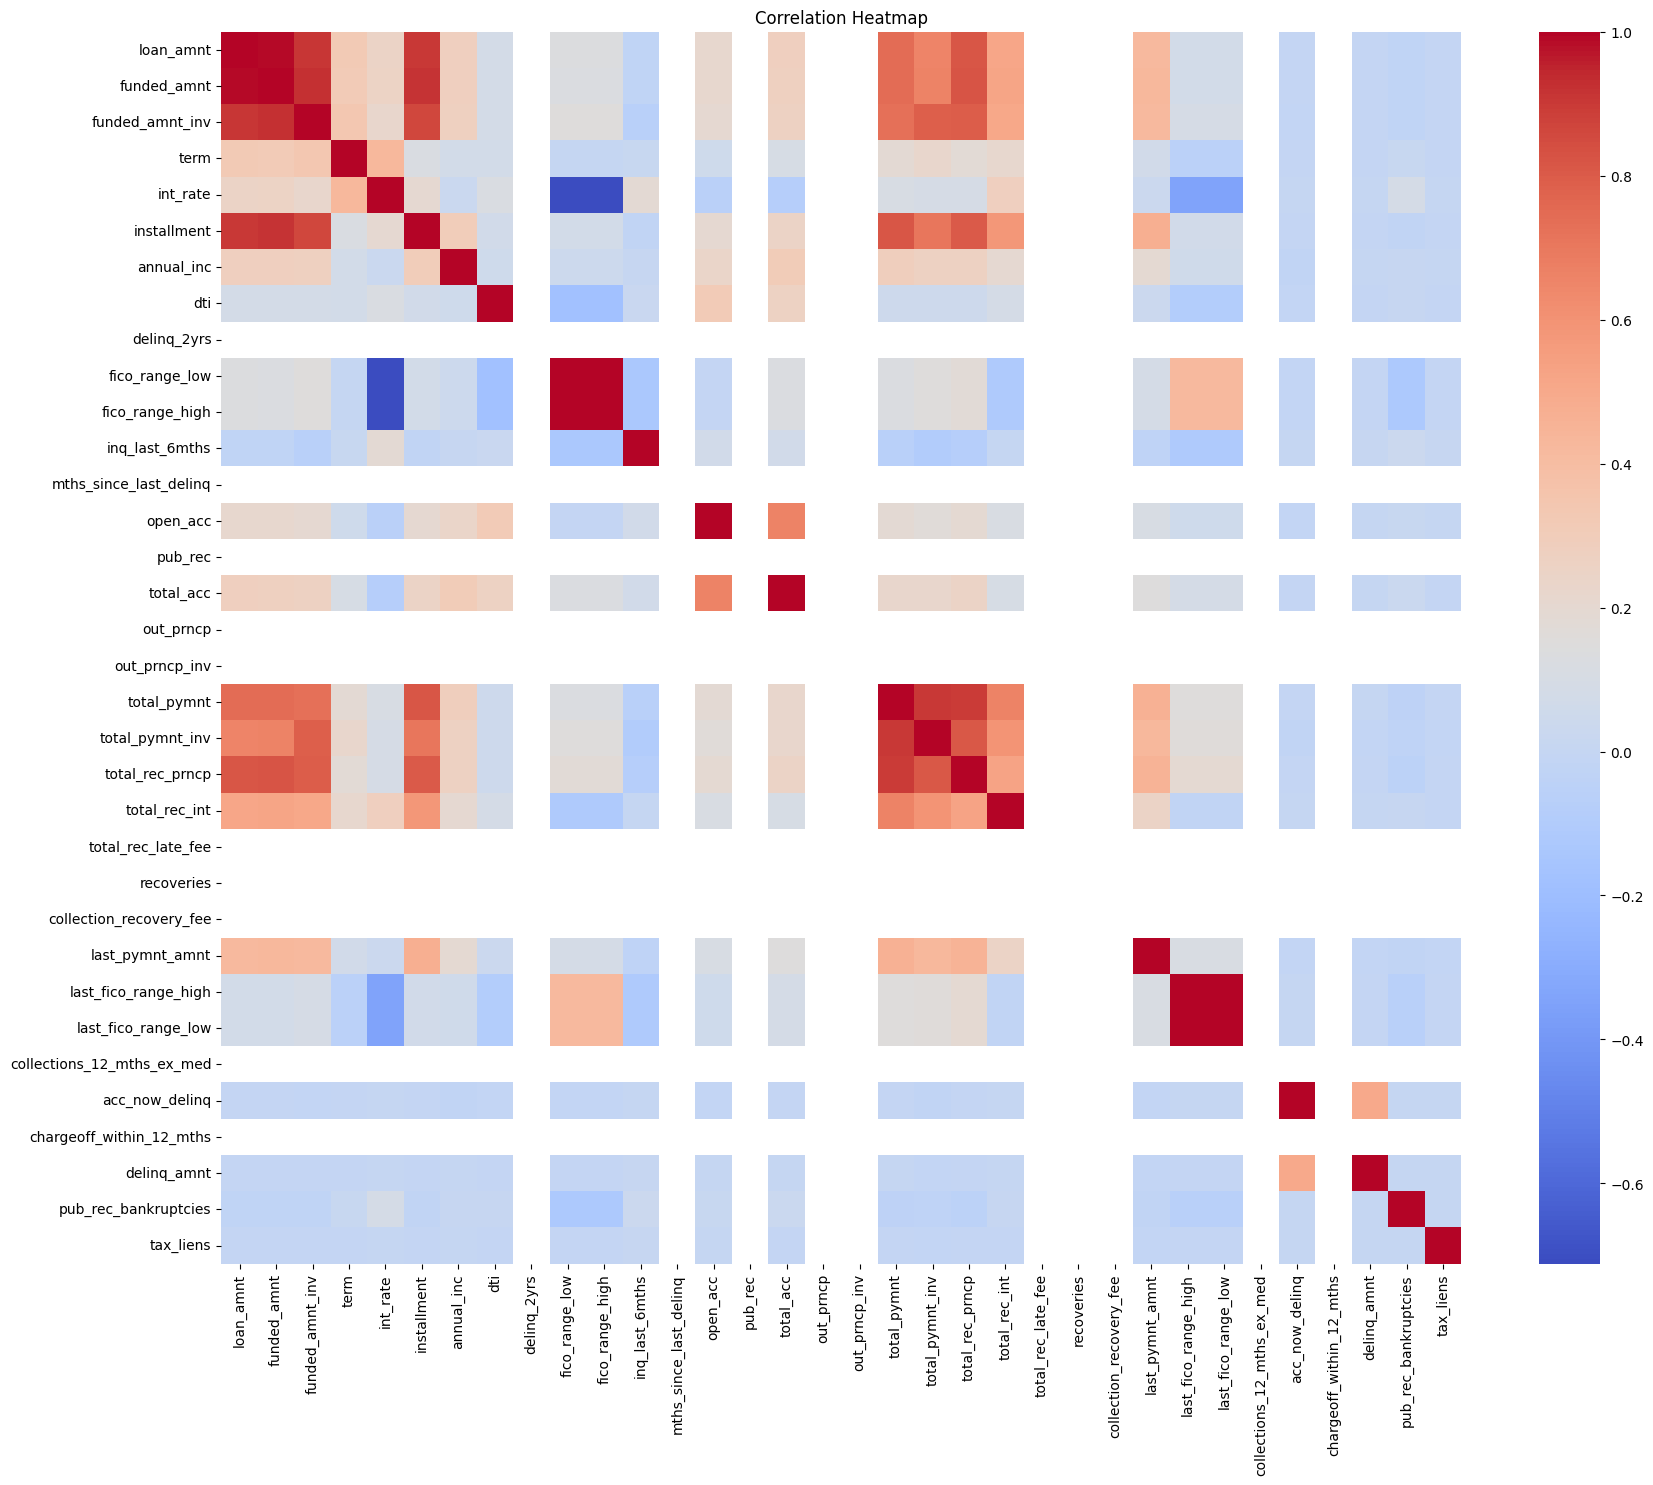

In [29]:
numeric_cols = loanDefault.select_dtypes(include=[np.number]).columns
correlation = loanDefault[numeric_cols].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

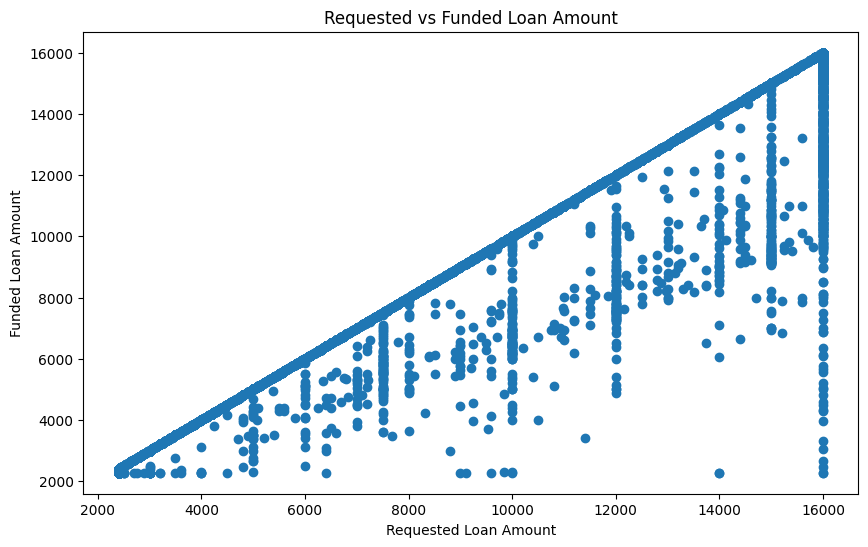

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(loanDefault['loan_amnt'], loanDefault['funded_amnt'])
plt.xlabel('Requested Loan Amount')
plt.ylabel('Funded Loan Amount')
plt.title('Requested vs Funded Loan Amount')
plt.show()

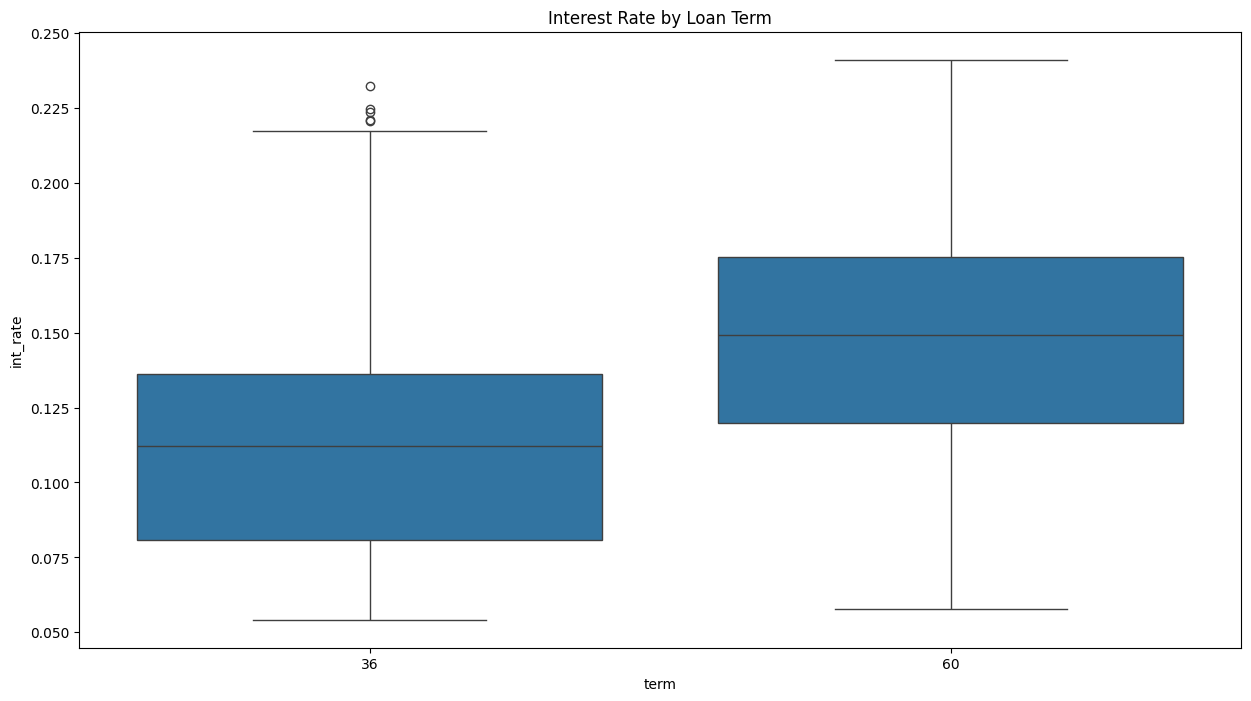

In [31]:
sampled_data = loanDefault.sample(frac=0.5, random_state=1)
plt.figure(figsize=(15, 8))
sns.boxplot(x='term', y='int_rate', data=sampled_data)
plt.title('Interest Rate by Loan Term')
plt.show()

In [32]:
if 'purpose' in loanDefault.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='purpose', data=loanDefault, order=loanDefault['purpose'].value_counts().index)
    plt.title('Distribution of Loan Purposes')
    plt.show()

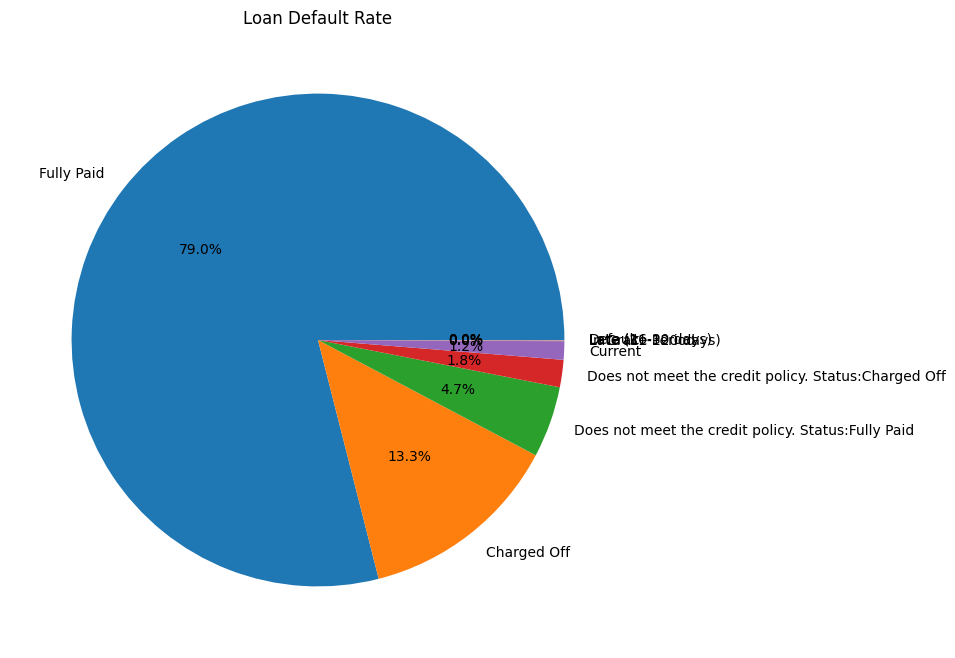

In [33]:
if 'loan_status' in loanDefault.columns:
    default_rate = loanDefault['loan_status'].value_counts(normalize=True)
    plt.figure(figsize=(8, 8))
    plt.pie(default_rate, labels=default_rate.index, autopct='%1.1f%%')
    plt.title('Loan Default Rate')
    plt.show()

In [34]:
print("Shape of dataframe after cleaning:", loanDefault.shape)
print("\nSample of cleaned data:")
print(loanDefault.head())

# Verify no nulls remain
assert loanDefault.isnull().sum().sum() == 0, "There are still null values in the dataset"

Shape of dataframe after cleaning: (42536, 46)

Sample of cleaned data:
   loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0     5000.0       5000.0           4975.0    36    0.1065     162.8700     B   
1     2500.0       2500.0           2500.0    60    0.1527      69.6905     C   
2     2400.0       2400.0           2400.0    36    0.1596      84.3300     C   
3    10000.0      10000.0          10000.0    36    0.1349     328.7160     C   
4     3000.0       3000.0           3000.0    60    0.1269      69.6905     B   

  sub_grade emp_length home_ownership  ...  last_pymnt_amnt  \
0        B2  10+ years           RENT  ...           171.62   
1        C4   < 1 year           RENT  ...           119.66   
2        C5  10+ years           RENT  ...           308.41   
3        C1  10+ years           RENT  ...           308.41   
4        B5     1 year           RENT  ...            67.79   

  last_credit_pull_d last_fico_range_high last_fico_range_low 

# Descriptive Analysis

### Analysis 1: Analysis of loan default rates by loan characteristics 

In [35]:
loanDefault["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [36]:
def default_rate(x):
    return x.mean() * 100

loanDefault['default'] = loanDefault['loan_status'].isin(['Charged Off', 'Default'])

# Convert the 'int_rate' column to strings, remove '%' and convert to float
loanDefault['int_rate'] = loanDefault['int_rate'].astype(str).str.rstrip('%').astype('float')

# Bin the interest rates into 10 bins
loanDefault['int_rate_bin'] = pd.cut(loanDefault['int_rate'], bins=10)

# Group by interest rate bins and calculate the default rate
int_rate_default = loanDefault.groupby('int_rate_bin')['default'].agg(default_rate).reset_index()

print(int_rate_default)


       int_rate_bin    default
0   (0.054, 0.0734]   4.632449
1  (0.0734, 0.0925]   6.984299
2   (0.0925, 0.112]  10.336223
3    (0.112, 0.131]  13.794431
4     (0.131, 0.15]  14.659827
5     (0.15, 0.169]  19.028418
6    (0.169, 0.188]  22.911051
7    (0.188, 0.208]  27.058824
8    (0.208, 0.227]  33.137255
9    (0.227, 0.246]  37.662338


/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_93898/1207281836.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  int_rate_default = loanDefault.groupby('int_rate_bin')['default'].agg(default_rate).reset_index()


In [37]:
# Bin the loan amounts into 10 bins and calculate default rates by loan amount
loanDefault['loan_amount_bin'] = pd.cut(loanDefault['loan_amnt'], bins=10)
loan_amount_default = loanDefault.groupby('loan_amount_bin')['default'].agg(default_rate).reset_index()

# Calculate default rates by term
term_default = loanDefault.groupby('term')['default'].agg(default_rate).reset_index()

# Plot default rates by loan amount
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_amount_bin', y='default', data=loan_amount_default)
plt.title('Default Rate by Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis1_default_rate_by_loan_amount.png')
plt.close()

# Plot default rates by term
plt.figure(figsize=(8, 6))
sns.barplot(x='term', y='default', data=term_default)
plt.title('Default Rate by Term')
plt.xlabel('Term')
plt.ylabel('Default Rate (%)')
plt.tight_layout()
plt.savefig('analysis1_default_rate_by_term.png')
plt.close()

# Plot default rates by interest rate
plt.figure(figsize=(12, 6))
sns.barplot(x='int_rate_bin', y='default', data=int_rate_default)
plt.title('Default Rate by Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('analysis1_default_rate_by_interest_rate.png')
plt.close()

print("Analysis of loan default rates by loan characteristics completed. Graphs saved as PNG files.")

# Display summary statistics
print("\
Default rate by loan amount:")
print(loan_amount_default)

print("\
Default rate by term:")
print(term_default)

print("\
Default rate by interest rate:")
print(int_rate_default)

/var/folders/wc/cjrm845j79n6z6l__hc5_zfh0000gn/T/ipykernel_93898/1965594853.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_default = loanDefault.groupby('loan_amount_bin')['default'].agg(default_rate).reset_index()


Analysis of loan default rates by loan characteristics completed. Graphs saved as PNG files.
Default rate by loan amount:
      loan_amount_bin    default
0    (2386.4, 3760.0]  12.591108
1    (3760.0, 5120.0]  12.390072
2    (5120.0, 6480.0]  10.668563
3    (6480.0, 7840.0]  11.936426
4    (7840.0, 9200.0]  12.157786
5   (9200.0, 10560.0]  12.376595
6  (10560.0, 11920.0]  11.627907
7  (11920.0, 13280.0]  12.492966
8  (13280.0, 14640.0]  13.296399
9  (14640.0, 16000.0]  16.191611
Default rate by term:
   term    default
0    36  10.233074
1    60  22.061631
Default rate by interest rate:
       int_rate_bin    default
0   (0.054, 0.0734]   4.632449
1  (0.0734, 0.0925]   6.984299
2   (0.0925, 0.112]  10.336223
3    (0.112, 0.131]  13.794431
4     (0.131, 0.15]  14.659827
5     (0.15, 0.169]  19.028418
6    (0.169, 0.188]  22.911051
7    (0.188, 0.208]  27.058824
8    (0.208, 0.227]  33.137255
9    (0.227, 0.246]  37.662338


### Analysis 2: Geographic distribution of defaults, identifying regions with higher or lower than average default rates.

In [38]:
# Convert two-digit years to four-digit years (e.g., Dec-11 to Dec-2011)
loanDefault['issue_d'] = loanDefault['issue_d'].apply(lambda x: x if len(x.split('-')[1]) == 4 else x[:-2] + '20' + x[-2:])
loanDefault['last_pymnt_d'] = loanDefault['last_pymnt_d'].apply(lambda x: x if len(x.split('-')[1]) == 4 else x[:-2] + '20' + x[-2:])

# Now parse the dates
loanDefault['issue_d'] = pd.to_datetime(loanDefault['issue_d'], format='%b-%Y')
loanDefault['last_pymnt_d'] = pd.to_datetime(loanDefault['last_pymnt_d'], format='%b-%Y')

In [39]:
loanDefault.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'default', 'int_rate_bin', 'loan_amount_bin'],
      dtype='object')

In [40]:
loanDefault['default'] = loanDefault['loan_status'].isin(['Charged Off', 'Default'])

# Geographic distribution of defaults
state_default_rates = loanDefault.groupby('addr_state')['default'].agg(['mean', 'count']).reset_index()
state_default_rates['default_rate'] = state_default_rates['mean'] * 100
state_default_rates = state_default_rates.sort_values('default_rate', ascending=False)

# Calculate the average default rate
avg_default_rate = loanDefault['default'].mean() * 100

# Plot geographic distribution of defaults
plt.figure(figsize=(15, 8))
sns.barplot(x='addr_state', y='default_rate', data=state_default_rates)
plt.axhline(y=avg_default_rate, color='r', linestyle='--', label='Average Default Rate')
plt.title('Default Rate by State')
plt.xlabel('State')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig('analysis2_default_rate_by_state.png')
plt.close()

print("Geographic distribution of defaults and time taken for loans to default analysis completed. Graphs saved as PNG files.")

# Display summary statistics
print("\
Top 10 states with highest default rates:")
print(state_default_rates.head(10))

print("\
\nBottom 10 states with lowest default rates:")
print(state_default_rates.tail(10))

Geographic distribution of defaults and time taken for loans to default analysis completed. Graphs saved as PNG files.
Top 10 states with highest default rates:
   addr_state      mean  count  default_rate
28         NE  0.272727     11     27.272727
32         NV  0.206831    527     20.683112
0          AK  0.186047     86     18.604651
40         SD  0.179104     67     17.910448
9          FL  0.163660   3104     16.365979
11         HI  0.154696    181     15.469613
4          CA  0.151817   7430     15.181696
36         OR  0.151709    468     15.170940
24         MO  0.149020    765     14.901961
43         UT  0.147482    278     14.748201

Bottom 10 states with lowest default rates:
   addr_state      mean  count  default_rate
45         VT  0.105263     57     10.526316
16         KS  0.104027    298     10.402685
8          DE  0.088235    136      8.823529
25         MS  0.076923     26      7.692308
7          DC  0.066964    224      6.696429
41         TN  0.062500     3

### Analysis 3: Examine the time taken for loans to default after issuance.

In [41]:
loanDefault['issue_d'] = pd.to_datetime(loanDefault['issue_d'], format='%b-%Y')
loanDefault['last_pymnt_d'] = pd.to_datetime(loanDefault['last_pymnt_d'], format='%b-%Y')

#calculating the time for default to occur in the time frame of 30 months 
loanDefault['time_to_default'] = (loanDefault['last_pymnt_d'] - loanDefault['issue_d']).dt.days / 30 

defaulted_loans = loanDefault[loanDefault['loan_status'].isin(['Charged Off', 'Default'])]

default_time_stats = defaulted_loans['time_to_default'].describe()
print(default_time_stats)

count    5654.000000
mean       20.009893
std        12.417822
min         0.933333
25%        10.141667
50%        18.266667
75%        27.433333
max        67.000000
Name: time_to_default, dtype: float64


In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(defaulted_loans['time_to_default'], bins=20, kde=True)
plt.title('Distribution of Time to Default')
plt.xlabel('Time to Default (Months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('analysis3_time_to_default_distribution.png')
plt.close()

In [43]:
loanDefault.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42536 entries, 0 to 42537
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   loan_amnt                   42536 non-null  float64       
 1   funded_amnt                 42536 non-null  float64       
 2   funded_amnt_inv             42536 non-null  float64       
 3   term                        42536 non-null  int64         
 4   int_rate                    42536 non-null  float64       
 5   installment                 42536 non-null  float64       
 6   grade                       42536 non-null  object        
 7   sub_grade                   42536 non-null  object        
 8   emp_length                  42536 non-null  object        
 9   home_ownership              42536 non-null  object        
 10  annual_inc                  42536 non-null  float64       
 11  verification_status         42536 non-null  object        


# Predictive Modelling: Model Building 

In [44]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix
# from imblearn.over_sampling import SMOTE
# import category_encoders as ce
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, classification_report

## Dataset Splitting

In [45]:
X = loanDefault.drop('default', axis=1)
y = loanDefault['default']

testSize = 0.3
randomState = 42

In [46]:
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].map(pd.Timestamp.timestamp)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=randomState)

## Feature Engineering

In [48]:
#converting data types (encoding categorical variables, date types)
encoder = ce.OneHotEncoder(cols=['int_rate_bin', 'loan_amount_bin'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/category_encoders/

In [49]:
x_train['loan_status']

9153      Fully Paid
30208    Charged Off
1429      Fully Paid
15572    Charged Off
18314     Fully Paid
            ...     
6265      Fully Paid
11284    Charged Off
38158     Fully Paid
860       Fully Paid
15795     Fully Paid
Name: loan_status, Length: 29775, dtype: object

### Imbalanced Class

In [50]:
# the value_counts function show imbalanced class
print(loanDefault['loan_status'].value_counts())

loan_status
Fully Paid                                             33587
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: count, dtype: int64


In [51]:
print(loanDefault['grade'].value_counts())

grade
B    12390
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: count, dtype: int64


In [52]:
print(loanDefault['sub_grade'].value_counts())

sub_grade
B3    2998
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: count, dtype: int64


In [53]:
print(loanDefault['home_ownership'].value_counts())

home_ownership
RENT        20182
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: count, dtype: int64


In [54]:
print(loanDefault['verification_status'].value_counts())

verification_status
Not Verified       18759
Verified           13471
Source Verified    10306
Name: count, dtype: int64


In [55]:
print(loanDefault['pymnt_plan'].value_counts())

pymnt_plan
n    42535
y        1
Name: count, dtype: int64


In [56]:
# check if any remaining non-numeric columns left
non_numeric_columns = x_train.select_dtypes(include=['object', 'category']).columns
print("Remaining non-numeric columns:", non_numeric_columns)

# encode remaining non-numeric columns
if len(non_numeric_columns) > 0:
    additional_encoder = ce.OneHotEncoder(cols=non_numeric_columns)
    x_train = additional_encoder.fit_transform(x_train)
    x_test = additional_encoder.transform(x_test)

Remaining non-numeric columns: Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'addr_state',
       'revol_util', 'last_credit_pull_d'],
      dtype='object')


In [57]:
# Apply SMOTE on the training data to handle class imbalance
smt = SMOTE(random_state=randomState)
x_res, y_res = smt.fit_resample(x_train, y_train)

## Logistic Regression Model

In [58]:
logReg = LogisticRegression()

In [59]:
logReg.fit(x_res, y_res)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = logReg.predict(x_test)

### Model Evaluation: Accuracy, Confusion Matrix, Roc-Auc Curve

In [61]:
accuracy = accuracy_score(y_test, y_pred)

In [62]:
print("Accuracy Score: ", accuracy*100, "%")

Accuracy Score:  93.98949925554425 %


In [64]:
confusionMatrix = confusion_matrix(y_test, y_pred)

In [65]:

print('Confusion matrix\n\n', confusionMatrix)

Confusion matrix

 [[10594   510]
 [  257  1400]]


Text(95.72222222222221, 0.5, 'Actual')

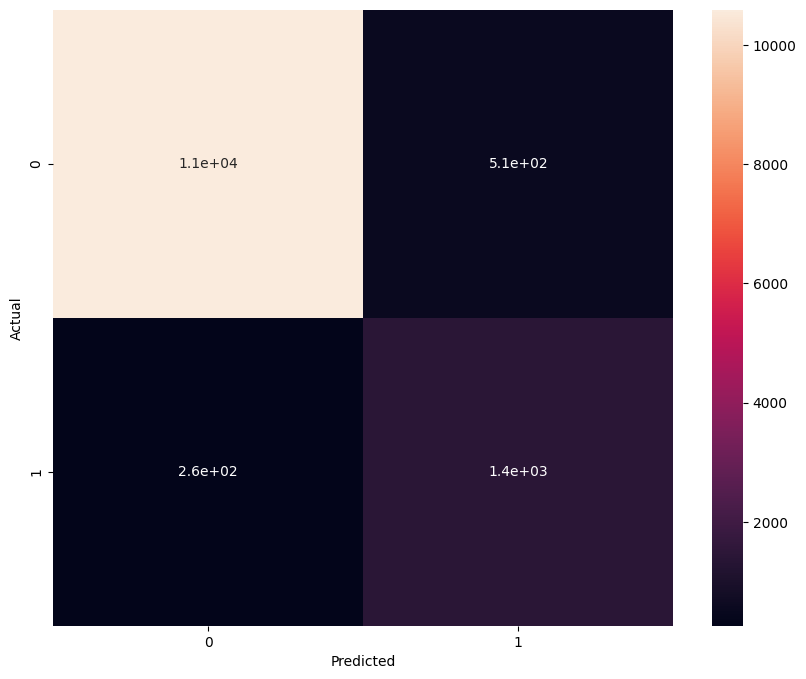

In [70]:
plt.figure(figsize = (10, 8))
sns.heatmap(confusionMatrix, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.95      0.97     11104
        True       0.73      0.84      0.78      1657

    accuracy                           0.94     12761
   macro avg       0.85      0.90      0.88     12761
weighted avg       0.94      0.94      0.94     12761



In [74]:
from sklearn.metrics import roc_curve, auc

In [75]:
class_probabilities = logReg.predict_proba(x_test)

In [76]:
aucroc_preds = class_probabilities[:, 1]

In [77]:
fpr, tpr, threshold = roc_curve(y_test, aucroc_preds)

In [78]:
roc_auc = auc(fpr, tpr)

In [80]:
print(roc_auc)

0.9587446889364655


Text(0, 0.5, 'True Positive Rate')

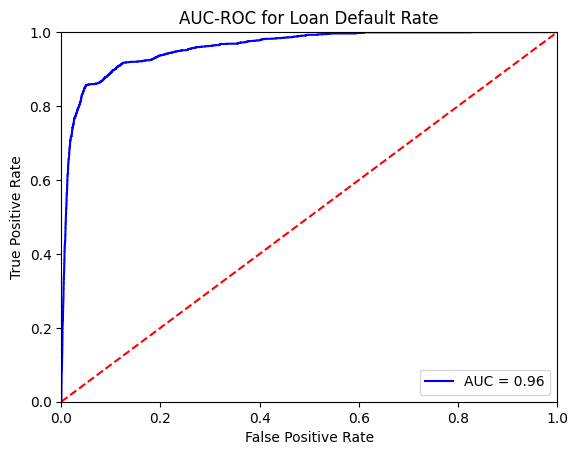

In [79]:
plt.title('AUC-ROC for Loan Default Rate')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Parameter Fine Tuning